In [2]:
from quantopian.research import prices, symbols, returns
import random
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from quantopian.research import prices
from quantopian.pipeline.filters import QTradableStocksUS
import alphalens as al
from pandas.tseries.offsets import BDay
from quantopian.pipeline.factors import Returns
from quantopian.pipeline.factors import AverageDollarVolume
from quantopian.pipeline.factors import SimpleMovingAverage
from quantopian.pipeline.data import USEquityPricing
from quantopian.pipeline.factors import BusinessDaysSincePreviousEvent
from quantopian.pipeline.filters import Q1500US
from quantopian.pipeline.filters import Q500US
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report,precision_score, make_scorer
# import the Pipeline versions
from time import time
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from quantopian.pipeline.data.factset.estimates import PeriodicConsensus
from quantopian.pipeline.domain import US_EQUITIES
import alphalens
import quantopian.pipeline.data.factset.estimates as fe
## This does not seem to be supported on Quantopian
##from sklearn.model_selection import train_test_split
##from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
##from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.linear_model import LogisticRegression
import alphalens
from datetime import timedelta 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from quantopian.pipeline.classifiers.morningstar import Sector
from quantopian.pipeline.factors import CustomFactor, AverageDollarVolume
from quantopian.pipeline.data import morningstar as mstar
from quantopian.pipeline.filters.morningstar import IsPrimaryShare
from datetime import datetime, timedelta, date

from quantopian.pipeline import Pipeline
from quantopian.pipeline.data.factset.estimates import Guidance
from quantopian.pipeline.factors import PercentChange
import seaborn as sns
sns.set(style="white")
import scipy
from sklearn.preprocessing import StandardScaler


class CloseOnN(CustomFactor):  
    # Define inputs
    inputs = [USEquityPricing.close]
    
    # Set window_length to whatever number of days to lookback as a default
    # in the case where no window_length is given when instantiated.
    # This can also be set/over-ridden as shown below:
    # my_close_on_10 = CloseOnN(window_length = 10)
    
    window_length = 2 
    
    def compute(self, today, assets, out, close):  
        out[:] = close[0]

def make_pipeline():

    
    return Pipeline(
        columns={
    'hist_returns' : Returns(window_length=2) , 
        },
        screen=   QTradableStocksUS() 
    )

start_date='2020-06-01'
end_date='2020-06-04'

data = run_pipeline(make_pipeline(), start_date, end_date)


In [3]:
data.head() 

hist_returns
2003-06-02 00:00:00+00:00 Equity(2 [HWM])        0.023333
                          Equity(24 [AAPL])     -0.011050
                          Equity(41 [ARCB])      0.004549
                          Equity(60 [ABS])      -0.009953
                          Equity(62 [ABT])       0.017816

In [4]:
asset_list = data.index.get_level_values(1).unique() 

In [5]:
asset_list

array([Equity(2 [HWM]), Equity(24 [AAPL]), Equity(41 [ARCB]), ...,
       Equity(53481 [SWTX]), Equity(50334 [FLGT]), Equity(53480 [NET])], dtype=object)

In [6]:
prices = get_pricing(asset_list,
                     start_date=start_date,
                     end_date=end_date,# Pricing end date should be later so we can get forward returns
                     fields='close_price')

df_i_1 = al.utils.get_clean_factor_and_forward_returns(
    data['hist_returns'],
    prices=prices,
    quantiles=5,
    periods =(1,),
    max_loss=100,
)



Dropped 0.5% entries from factor data: 0.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 10000.0%, not exceeded: OK!


In [7]:
df_i_1 

1D        3D        5D  \
date                      asset                                                
2003-06-02 00:00:00+00:00 Equity(2 [HWM])      -0.008703  0.020182  0.008313   
                          Equity(24 [AAPL])    -0.008341  0.010195 -0.037071   
                          Equity(41 [ARCB])     0.007127 -0.059684 -0.040923   
                          Equity(60 [ABS])      0.007965 -0.097449 -0.087090   
                          Equity(62 [ABT])      0.000852  0.028901  0.022083   
                          Equity(64 [GOLD])     0.011297  0.052513  0.025401   
                          Equity(67 [ADSK])     0.046741  0.095054  0.108491   
                          Equity(76 [TAP])     -0.017446 -0.001834 -0.017812   
                          Equity(85 [ACF])     -0.032787  0.033751 -0.088717   
                          Equity(88 [ACI])     -0.001318  0.020202  0.016250   
                          Equity(107 [ACV])     0.006725  0.002973 -0.004176   
                          Equity(110 [RAMP])    0.018929  0.106530  0.036464   
                          Equity(114 [ADBE])   -0.001144  0.073909  0.010812   
                          Equity(115 [ADCT])   -0.021898  0.040146 -0.032482   
                          Equity(122 [ADI])     0.013661  0.039127 -0.017135   
                          Equity(128 [ADM])     0.001683  0.017314  0.017314   
                          Equity(146 [AD])      0.001442  0.041939  0.023038   
                          Equity(154 [AEM])    -0.003648  0.062226  0.047842   
                          Equity(161 [AEP])    -0.006754  0.000334 -0.013106   
                          Equity(166 [AES])     0.002508  0.038407 -0.003606   
                          Equity(168 [AET])    -0.007152  0.048200  0.070124   
                          Equity(185 [AFL])    -0.015641 -0.009851 -0.038628   
                          Equity(197 [AGCO])   -0.016266  0.056539  0.066623   
                          Equity(198 [AGE])    -0.012054  0.012632  0.015043   
                          Equity(205 [AGN])     0.005334  0.067766  0.063977   
                          Equity(209 [AM])     -0.019966  0.006900 -0.018792   
                          Equity(216 [HES])    -0.003248 -0.002417 -0.010122   
                          Equity(239 [AIG])    -0.011128  0.008323 -0.018022   
                          Equity(266 [AJG])    -0.014559  0.020742 -0.025462   
                          Equity(272 [AL])      0.020214  0.050978  0.002902   
...                                                  ...       ...       ...   
2020-05-20 00:00:00+00:00 Equity(53158 [UBER]) -0.006669  0.002320 -0.009568   
                          Equity(53179 [FSLY])  0.039276 -0.075494 -0.044685   
                          Equity(53181 [AVTR]) -0.027663  0.048264  0.077693   
                          Equity(53196 [CTVA]) -0.022311  0.021912  0.075299   
                          Equity(53238 [RVLV])  0.001517  0.106980  0.045524   
                          Equity(53244 [AMCR])  0.002141  0.058238  0.069479   
                          Equity(53248 [CRWD]) -0.003031 -0.018371 -0.016515   
                          Equity(53251 [FVRR]) -0.076958 -0.056902 -0.085923   
                          Equity(53256 [CHWY])  0.019533  0.057839  0.059614   
                          Equity(53260 [IAA])  -0.025120  0.049172  0.083111   
                          Equity(53267 [STOK])  0.025263 -0.069298 -0.057544   
                          Equity(53271 [WORK])  0.009830  0.033448  0.038555   
                          Equity(53273 [GO])   -0.004497 -0.020370 -0.043122   
                          Equity(53293 [BSTZ]) -0.000958  0.000958  0.012452   
                          Equity(53303 [BBIO]) -0.003443  0.012052  0.007461   
                          Equity(53304 [ADPT]) -0.010625 -0.028416 -0.038053   
                          Equity(53306 [CHNG])  0.017399  0.021955  0.024855   
                          Equity(53313 [REAL])  0.0162

Quantiles Statistics


min       max      mean       std    count    count %
factor_quantile                                                            
1               -0.989904  0.053211 -0.025421  0.027681  1694293  20.027684
2               -0.196771  0.088057 -0.007199  0.014186  1692073  20.001442
3               -0.152985  0.119225  0.000143  0.013325  1690724  19.985496
4               -0.117798  0.159686  0.007594  0.014126  1690078  19.977860
5               -0.080473  2.954430  0.027014  0.030248  1692587  20.007518

Returns Analysis


1D     3D     5D     7D  \
Ann. alpha                                    -0.022 -0.026 -0.024 -0.018   
beta                                          -0.056 -0.072 -0.074 -0.072   
Mean Period Wise Return Top Quantile (bps)    -1.529 -1.489 -1.348 -1.122   
Mean Period Wise Return Bottom Quantile (bps)  1.231  1.406  1.289  1.051   
Mean Period Wise Spread (bps)                 -2.760 -2.863 -2.602 -2.144   

                                                 10D  
Ann. alpha                                    -0.011  
beta                                          -0.060  
Mean Period Wise Return Top Quantile (bps)    -0.764  
Mean Period Wise Return Bottom Quantile (bps)  0.626  
Mean Period Wise Spread (bps)                 -1.363

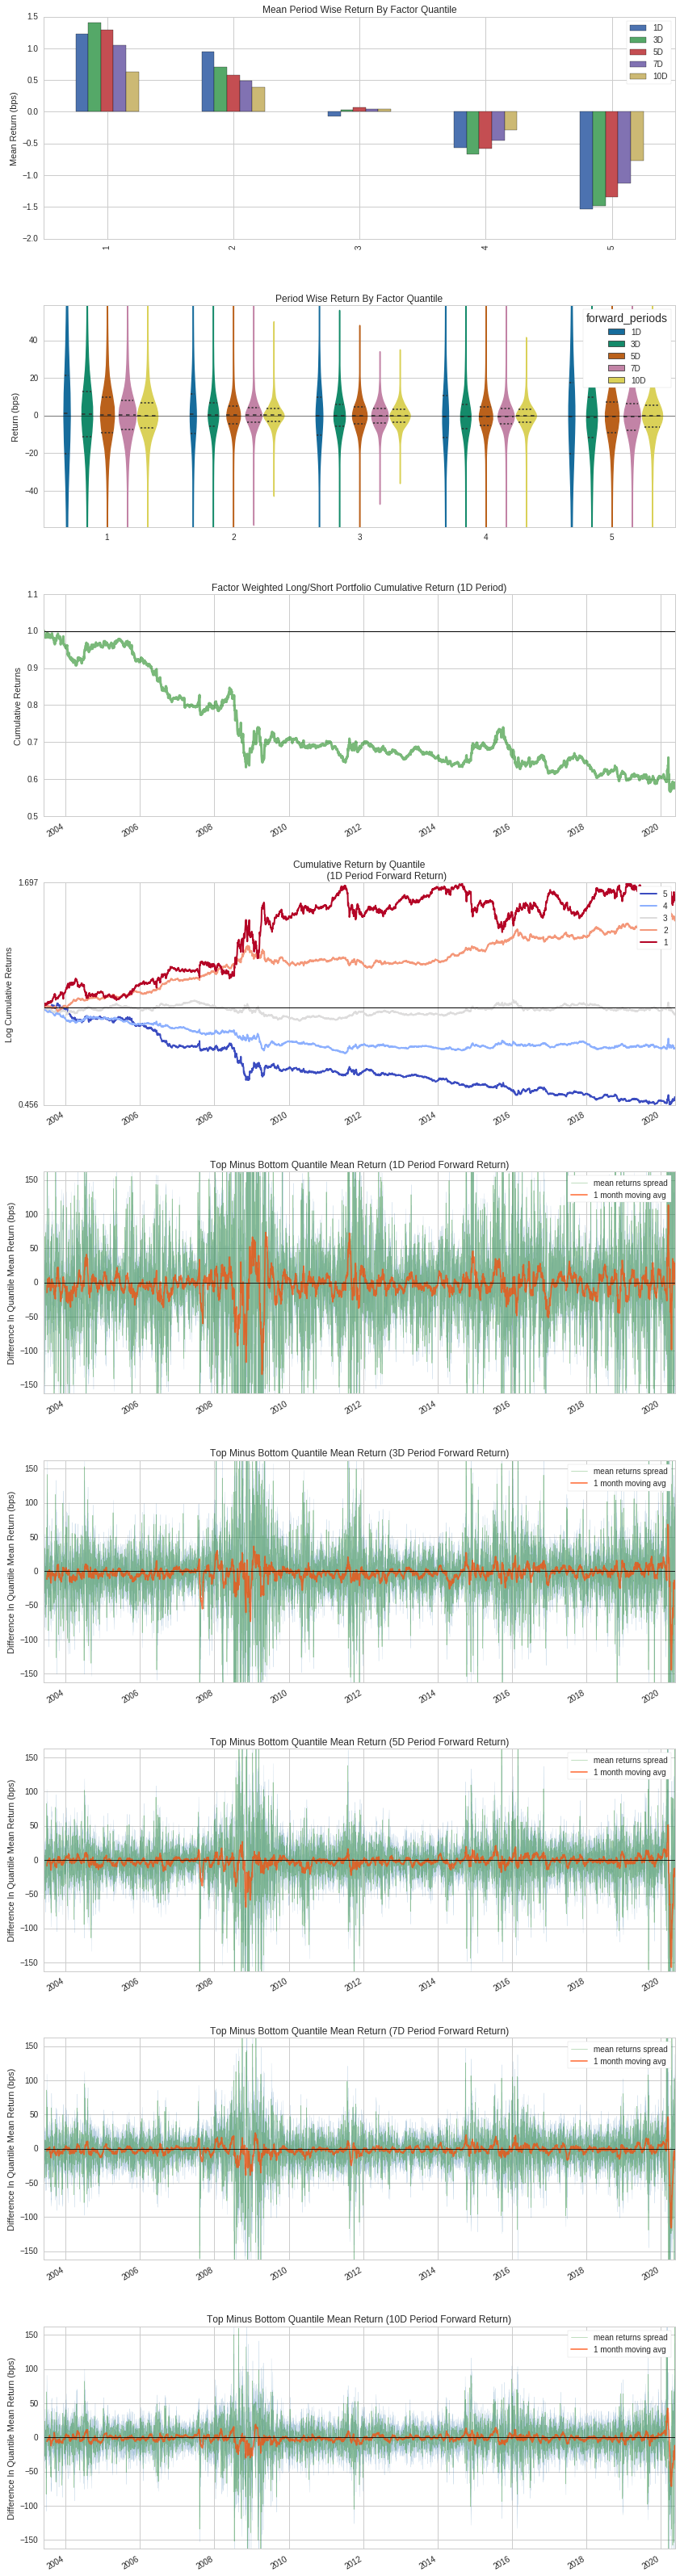

Information Analysis


1D     3D     5D     7D    10D
IC Mean          -0.003 -0.007 -0.008 -0.008 -0.006
IC Std.           0.123  0.120  0.117  0.114  0.111
Risk-Adjusted IC -0.021 -0.062 -0.066 -0.072 -0.051
t-stat(IC)       -1.389 -4.030 -4.291 -4.688 -3.362
p-value(IC)       0.165  0.000  0.000  0.000  0.001
IC Skew          -0.043 -0.136 -0.171 -0.236 -0.250
IC Kurtosis       0.834  1.165  1.366  1.368  1.387

/venvs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


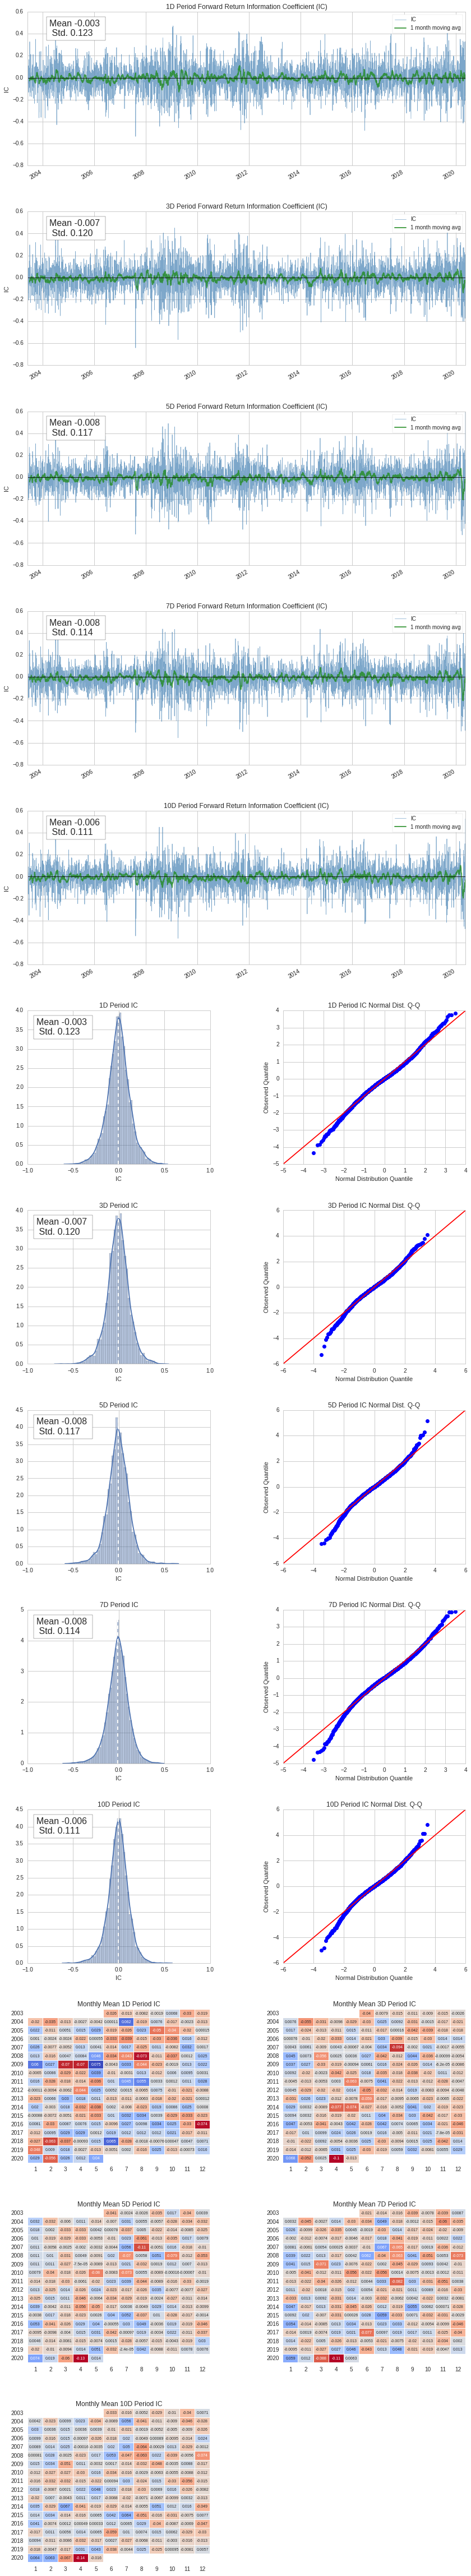

/venvs/py35/lib/python3.5/site-packages/alphalens/utils.py:912: UserWarning: Skipping return periods that aren't exact multiples of days.
  + " of days."


Turnover Analysis


1D     3D     5D     7D    10D
Quantile 1 Mean Turnover   0.764  0.766  0.767  0.769  0.767
Quantile 2 Mean Turnover   0.789  0.791  0.791  0.793  0.793
Quantile 3 Mean Turnover   0.770  0.775  0.777  0.778  0.779
Quantile 4 Mean Turnover   0.788  0.789  0.789  0.790  0.791
Quantile 5 Mean Turnover   0.769  0.776  0.777  0.779  0.777

1D     3D   5D   7D    10D
Mean Factor Rank Autocorrelation -0.011 -0.003  0.0 -0.0  0.005

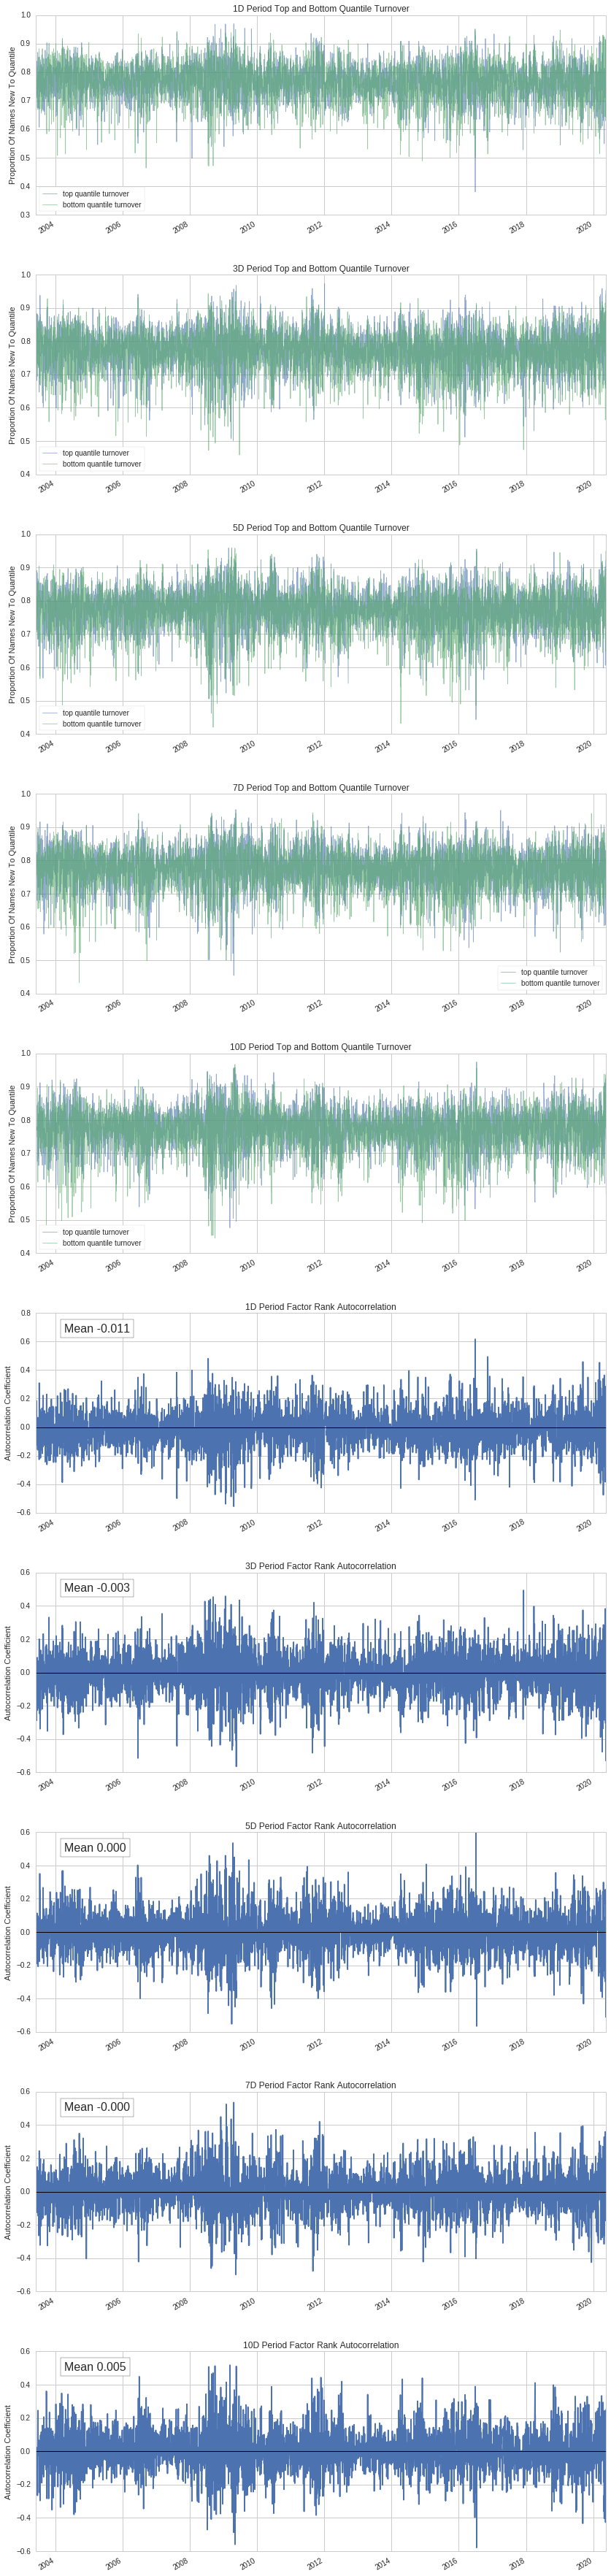

In [8]:
alphalens.tears.create_full_tear_sheet(df_i_1, by_group=False);

In [3]:
#from quantopian.research import prices, symbols, returns
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
#from quantopian.research import prices
from quantopian.pipeline.filters import QTradableStocksUS
from quantopian.pipeline.factors import Returns
import numpy as np
import alphalens as al
from quantopian.pipeline.factors import CustomFactor
from quantopian.pipeline.data import USEquityPricing
from quantopian.research import volumes, symbols, prices

class CloseOnN(CustomFactor):  
    
    # Define inputs
    inputs = [USEquityPricing.close]
    
    # Set window_length to whatever number of days to lookback as a default
    # in the case where no window_length is given when instantiated.
    # This can also be set/over-ridden as shown below:
    # my_close_on_10 = CloseOnN(window_length = 10)
    
    window_length = 2 
    
    def compute(self, today, assets, out, close):  
        out[:] = close[0]

def make_pipeline():
   
    #longs  = Returns(window_length=2).percentile_between(0,20,mask=QTradableStocksUS())
    #shorts = Returns(window_length=2).percentile_between(80,100,mask=QTradableStocksUS())   
    longs = Returns(window_length=2).bottom(1,mask=QTradableStocksUS())
    shorts = Returns(window_length=2).top(1,mask=QTradableStocksUS())    

    return Pipeline(
        columns={
            'longs':  longs,
            'shorts': shorts,
            'Returns':Returns(window_length=2)
            #'close_1': CloseOnN(window_length = 1),
            #'close_2': CloseOnN(window_length = 2),
            #'close_3': CloseOnN(window_length = 3),
        },
        screen=QTradableStocksUS()& (shorts | longs)
    )
start_date='2002-11-01'
#start_date='2020-06-01'
end_date='2020-06-05'
data = run_pipeline(make_pipeline(), start_date, end_date)

In [4]:
data[data['longs']==True]

Returns longs shorts
2002-11-01 00:00:00+00:00 Equity(5343 [THC])   -0.275167  True  False
2002-11-04 00:00:00+00:00 Equity(4355 [LANC])  -0.198020  True  False
2002-11-05 00:00:00+00:00 Equity(1482 [CHD])   -0.126225  True  False
2002-11-06 00:00:00+00:00 Equity(24064 [CNP])  -0.165354  True  False
2002-11-07 00:00:00+00:00 Equity(19917 [BKNG]) -0.267965  True  False
2002-11-08 00:00:00+00:00 Equity(4873 [MIK])   -0.243913  True  False
2002-11-11 00:00:00+00:00 Equity(5343 [THC])   -0.468009  True  False
2002-11-12 00:00:00+00:00 Equity(166 [AES])    -0.201031  True  False
2002-11-13 00:00:00+00:00 Equity(4954 [MO])    -0.133877  True  False
2002-11-14 00:00:00+00:00 Equity(12200 [LGND]) -0.291781  True  False
2002-11-15 00:00:00+00:00 Equity(22603 [ILA])  -0.356287  True  False
2002-11-18 00:00:00+00:00 Equity(7630 [TTN])   -0.164000  True  False
2002-11-19 00:00:00+00:00 Equity(22720 [GEN])  -0.110577  True  False
2002-11-20 00:00:00+00:00 Equity(7289 [T])     -0.597331  True  False
2002-11-21 00:00:00+00:00 Equity(24791 [OUTR]) -0.116548  True  False
2002-11-22 00:00:00+00:00 Equity(26437 [PDCO]) -0.190730  True  False
2002-11-25 00:00:00+00:00 Equity(20061 [BRCD]) -0.275820  True  False
2002-11-26 00:00:00+00:00 Equity(4653 [MME])   -0.126426  True  False
2002-11-27 00:00:00+00:00 Equity(6961 [SMTC])  -0.197129  True  False
2002-11-29 00:00:00+00:00 Equity(15907 [TKTX]) -0.329593  True  False
2002-12-02 00:00:00+00:00 Equity(22092 [AV])   -0.118182  True  False
2002-12-03 00:00:00+00:00 Equity(3303 [GP])    -0.107091  True  False
2002-12-04 00:00:00+00:00 Equity(18335 [PRV])  -0.186228  True  False
2002-12-05 00:00:00+00:00 Equity(4794 [MENT])  -0.213721  True  False
2002-12-06 00:00:00+00:00 Equity(20238 [JILL]) -0.282051  True  False
2002-12-09 00:00:00+00:00 Equity(4031 [IONS])  -0.217347  True  False
2002-12-10 00:00:00+00:00 Equity(20284 [SKX])  -0.417427  True  False
2002-12-11 00:00:00+00:00 Equity(16954 [SPOT]) -0.212900  True  False
2002-12-12 00:00:00+00:00 Equity(734 [BAX])    -0.080485  True  False
2002-12-13 00:00:00+00:00 Equity(13798 [BLDP]) -0.132653  True  False
...                                                  ...   ...    ...
2020-04-24 00:00:00+00:00 Equity(16589 [IVZ])  -0.210240  True  False
2020-04-27 00:00:00+00:00 Equity(32726 [EHTH]) -0.135832  True  False
2020-04-28 00:00:00+00:00 Equity(27908 [CPA])  -0.175414  True  False
2020-04-29 00:00:00+00:00 Equity(49000 [BPMC]) -0.172477  True  False
2020-04-30 00:00:00+00:00 Equity(50070 [HTZ])  -0.198397  True  False
2020-05-01 00:00:00+00:00 Equity(5643 [OLN])   -0.178495  True  False
2020-05-04 00:00:00+00:00 Equity(5629 [OII])   -0.188845  True  False
2020-05-05 00:00:00+00:00 Equity(47884 [PLAY]) -0.152375  True  False
2020-05-06 00:00:00+00:00 Equity(43981 [NCLH]) -0.225572  True  False
2020-05-07 00:00:00+00:00 Equity(46370 [INGN]) -0.256261  True  False
2020-05-08 00:00:00+00:00 Equity(48531 [VSTO]) -0.265052  True  False
2020-05-11 00:00:00+00:00 Equity(22835 [PRA])  -0.216535  True  False
2020-05-12 00:00:00+00:00 Equity(48575 [XHR])  -0.154018  True  False
2020-05-13 00:00:00+00:00 Equity(52427 [EB])   -0.237417  True  False
2020-05-14 00:00:00+00:00 Equity(50606 [VREX]) -0.326619  True  False
2020-05-15 00:00:00+00:00 Equity(34483 [VRTU]) -0.206299  True  False
2020-05-18 00:00:00+00:00 Equity(26439 [VVI])  -0.120866  True  False
2020-05-19 00:00:00+00:00 Equity(51350 [FSCT]) -0.236628  True  False
2020-05-20 00:00:00+00:00 Equity(44311 [MODN]) -0.184301  True  False
2020-05-21 00:00:00+00:00 Equity(29083 [CYRX]) -0.204250  True  False
2020-05-22 00:00:00+00:00 Equity(33062 [SRNE]) -0.117575  True  False
2020-05-26 00:00:00+00:00 Equity(43505 [ICPT]) -0.121915  True  False
2020-05-27 00:00:00+00:00 Equity(50070 [HTZ])  -0.791519  True  False
2020-05-28 00:00:00+00:00 Equity(1407 [CVM])   -0.105727  True  False
2020-05-29 00:00:00+00:00 Equity(50070 [HTZ])  -0.218750  True  False
2020-06-01 00:00:00+00:00 Equity(52454 [ARVN]) -0.256594  T

In [115]:
data[data['shorts']==True]

Returns  longs shorts
2020-06-03 00:00:00+00:00 Equity(45239 [PGEN])  0.824885  False   True

In [2]:
data

Returns  longs shorts
2020-06-01 00:00:00+00:00 Equity(21104 [AGEN])  0.297909  False   True
                          Equity(52454 [ARVN]) -0.256594   True  False
2020-06-02 00:00:00+00:00 Equity(40165 [AMRS])  0.440860  False   True
                          Equity(49100 [EVH])  -0.229842   True  False
2020-06-03 00:00:00+00:00 Equity(22151 [OSUR]) -0.142958   True  False
                          Equity(45239 [PGEN])  0.824885  False   True
2020-06-04 00:00:00+00:00 Equity(20799 [DHC])   0.364221  False   True
                          Equity(45239 [PGEN]) -0.169444   True  False
2020-06-05 00:00:00+00:00 Equity(45971 [AAL])   0.412221  False   True
                          Equity(51961 [SMAR]) -0.229812   True  False

In [105]:
close = prices(
    assets=symbols(['INO','NVAX','SMAR','CMTL']),
    start='2020-06-02',
    end='2020-06-08',
    frequency='daily'
)
close.head(20)

Equity(3150 [INO])  Equity(14112 [NVAX])  \
2020-06-02 00:00:00+00:00              14.370                 49.61   
2020-06-03 00:00:00+00:00              12.470                 44.25   
2020-06-04 00:00:00+00:00              11.878                 44.66   
2020-06-05 00:00:00+00:00              11.951                 46.28   
2020-06-08 00:00:00+00:00                 NaN                   NaN   

                           Equity(51961 [SMAR])  Equity(1675 [CMTL])  
2020-06-02 00:00:00+00:00                58.330               18.510  
2020-06-03 00:00:00+00:00                59.070               21.010  
2020-06-04 00:00:00+00:00                45.495               17.190  
2020-06-05 00:00:00+00:00                44.540               17.643  
2020-06-08 00:00:00+00:00                   NaN                  NaN

In [5]:
data["factor"] = np.where(data["longs"]==True, 1, 0)

In [6]:
asset_list = data.index.get_level_values(1).unique() 

In [7]:
prices = get_pricing(asset_list,
                     start_date=start_date,
                     end_date=end_date,
                     fields='close_price')

In [10]:
df_i_1 = al.utils.get_clean_factor_and_forward_returns(
    data['longs'],
    prices=prices,
    quantiles=1,
    periods =(1,),
    max_loss=100,
)

Dropped 0.5% entries from factor data: 0.3% in forward returns computation and 0.2% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 10000.0%, not exceeded: OK!


In [9]:
df_i_1.sort_values('factor_quantile')

1D  factor  \
date                      asset                                    
2002-11-01 00:00:00+00:00 Equity(166 [AES])    -0.050420       0   
2012-08-09 00:00:00+00:00 Equity(24814 [DF])   -0.005979       0   
2012-08-08 00:00:00+00:00 Equity(39782 [BSFT]) -0.020993       0   
2012-08-07 00:00:00+00:00 Equity(21813 [SOHU]) -0.015932       0   
2012-08-06 00:00:00+00:00 Equity(19127 [KCG])  -0.006536       0   
2012-08-03 00:00:00+00:00 Equity(9736 [GMCR])  -0.007880       0   
2012-08-02 00:00:00+00:00 Equity(40576 [RFP])   0.033522       0   
2012-08-01 00:00:00+00:00 Equity(1882 [CRUS])   0.020039       0   
2012-07-31 00:00:00+00:00 Equity(10509 [SHAW])  0.002309       0   
2012-08-10 00:00:00+00:00 Equity(6529 [RBN])    0.007042       0   
2012-07-30 00:00:00+00:00 Equity(88 [ACI])     -0.001387       0   
2012-07-26 00:00:00+00:00 Equity(35036 [LL])    0.035949       0   
2012-07-25 00:00:00+00:00 Equity(38374 [DGI])   0.046813       0   
2012-07-24 00:00:00+00:00 Equity(22247 [NXY])  -0.010004       0   
2012-07-23 00:00:00+00:00 Equity(38865 [DOLE]) -0.020182       0   
2012-07-20 00:00:00+00:00 Equity(33316 [MLNX]) -0.013783       0   
2012-07-19 00:00:00+00:00 Equity(465 [APH])    -0.014042       0   
2012-07-18 00:00:00+00:00 Equity(19497 [MMR])  -0.033958       0   
2012-07-17 00:00:00+00:00 Equity(26350 [PRX])   0.001000       0   
2012-07-27 00:00:00+00:00 Equity(33698 [TMUS]) -0.015533       0   
2012-08-13 00:00:00+00:00 Equity(41554 [FIO])  -0.016393       0   
2012-08-14 00:00:00+00:00 Equity(5092 [MTG])   -0.053042       0   
2012-08-15 00:00:00+00:00 Equity(21724 [ARNA]) -0.053269       0   
2012-09-12 00:00:00+00:00 Equity(42175 [ANGI])  0.027959       0   
2012-09-11 00:00:00+00:00 Equity(5092 [MTG])   -0.046912       0   
2012-09-10 00:00:00+00:00 Equity(6317 [ZQK])   -0.002801       0   
2012-09-07 00:00:00+00:00 Equity(20276 [RDN])   0.064539       0   
2012-09-06 00:00:00+00:00 Equity(5583 [ODP])    0.002446       0   
2012-09-05 00:00:00+00:00 Equity(13692 [MRX])   0.000230       0   
2012-09-04 00:00:00+00:00 Equity(2614 [ESL])    0.006329       0   
...                                                  ...     ...   
2013-02-11 00:00:00+00:00 Equity(19926 [NUAN]) -0.031267       1   
2006-06-22 00:00:00+00:00 Equity(23283 [CNC])   0.023440       1   
2013-02-07 00:00:00+00:00 Equity(17632 [CHRW]) -0.003510       1   
2006-06-23 00:00:00+00:00 Equity(27092 [ASPV])  0.027503       1   
2013-02-06 00:00:00+00:00 Equity(88 [ACI])     -0.032733       1   
2013-02-05 00:00:00+00:00 Equity(4849 [SPGI])  -0.006673       1   
2013-02-04 00:00:00+00:00 Equity(26426 [LTM])  -0.010693       1   
2006-06-26 00:00:00+00:00 Equity(14972 [NBIX]) -0.042751       1   
2013-02-08 00:00:00+00:00 Equity(20680 [AKAM]) -0.002824       1   
2013-01-31 00:00:00+00:00 Equity(21723 [MTOR])  0.021930       1   
2013-02-20 00:00:00+00:00 Equity(14596 [ELNK]) -0.023139       1   
2006-06-16 00:00:00+00:00 Equity(23780 [HEW])  -0.037445       1   
2006-06-09 00:00:00+00:00 Equity(11321 [JOSB]) -0.040220       1   
2013-03-08 00:00:00+00:00 Equity(5092 [MTG])    0.044829       1   
2013-03-07 00:00:00+00:00 Equity(21813 [SOHU])  0.008320       1   
2013-03-06 00:00:00+00:00 Equity(37849 [IPXL])  0.015809       1   
2013-03-05 00:00:00+00:00 Equity(39942 [AT])   -0.005282       1   
2006-06-12 00:00:00+00:00 Equity(16820 [TTWO]) -0.014504       1   
2013-03-04 00:00:00+00:00 Equity(39942 [AT])   -0.040541       1   
2013-02-21 00:00:00+00:00 Equity(23691 [HNR])   0.037096       1   
2006-06-13 00:00:00+00:00 Equity(8620 [CMVT])  -0.007128       1   
2013-02-28 00:00:00+00:00 Equity(24891 [CBB])  -0.074074       1   
2013-02-27 00:00:00+00:00 Equity(38882 [VSI])   0.009619       1   
2006-06-14 00:00:00+00:00 Equity(8831 [JBL])    0.040385       1   
2013-02-26 00:00:00+00:00 Equity(25972 [DVAX]) -0.047867       1   
2006-06-15 00:00:00+00:00 Equity(26978 [OXPS]) -0.040636       1   
2013-02-25 00:00:00+00:00 Equity(3950 [INT

Quantiles Statistics


min  max  mean  std    count  count %
factor_quantile                                       
1.0                0    0     0  0.0  1403759     50.0
2.0                1    1     1  0.0  1403759     50.0

Returns Analysis


1D
Ann. alpha                                     0.014
beta                                           0.050
Mean Period Wise Return Top Quantile (bps)     0.691
Mean Period Wise Return Bottom Quantile (bps) -0.691
Mean Period Wise Spread (bps)                  1.383

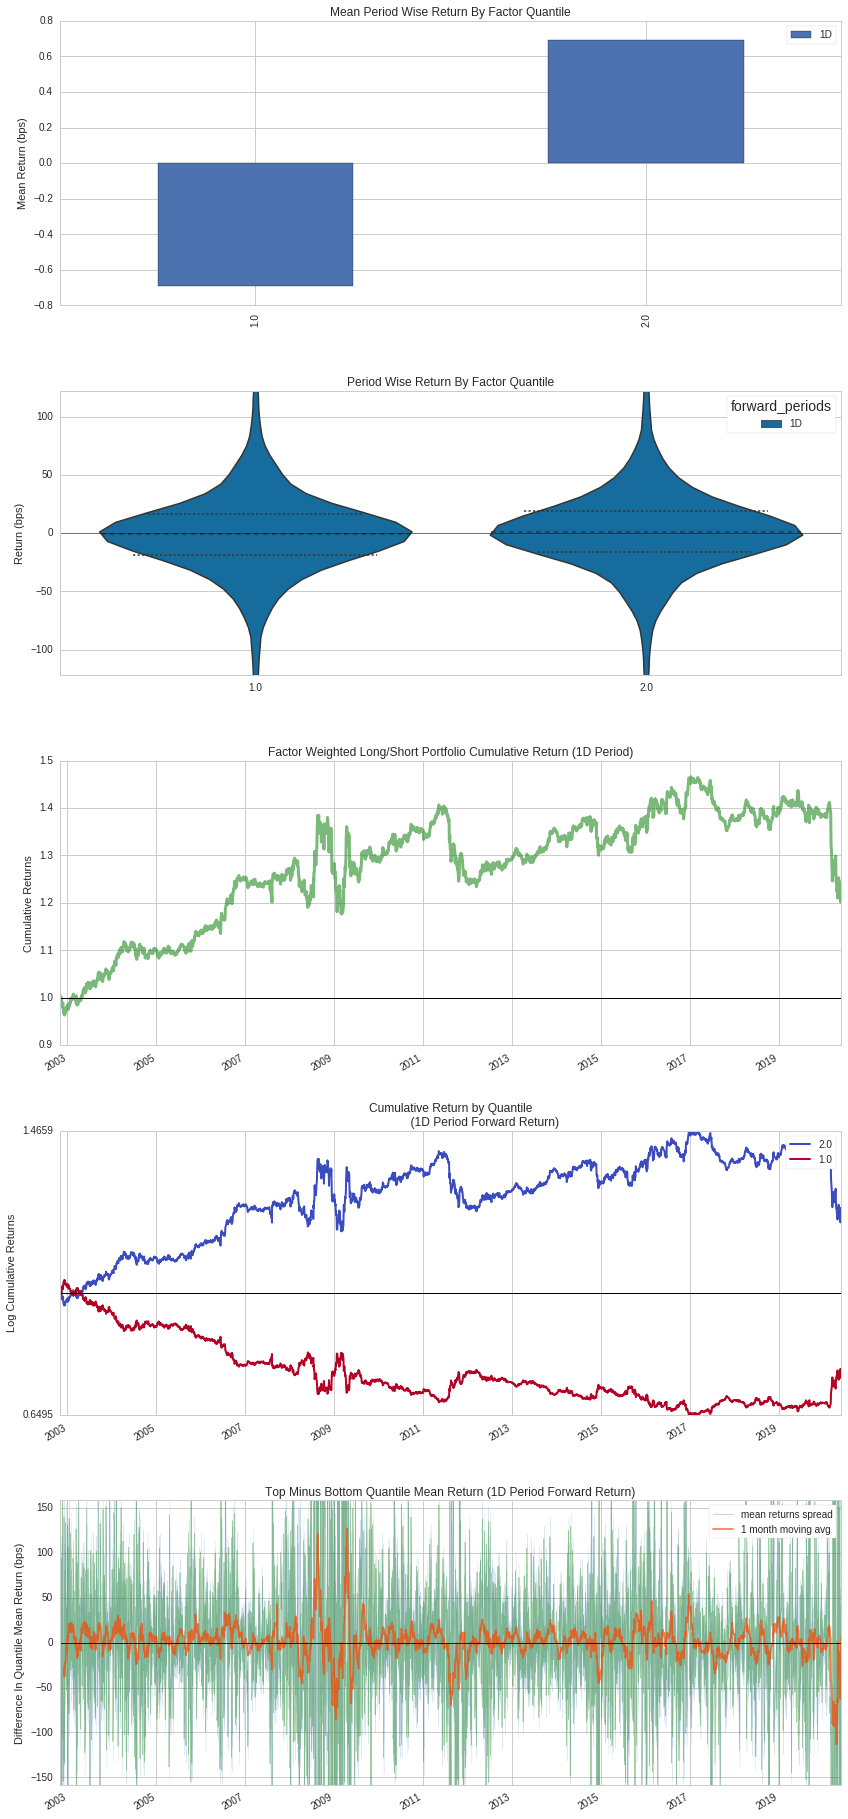

Information Analysis


1D
IC Mean           0.002
IC Std.           0.160
Risk-Adjusted IC  0.014
t-stat(IC)        0.859
p-value(IC)       0.390
IC Skew           0.000
IC Kurtosis       0.732

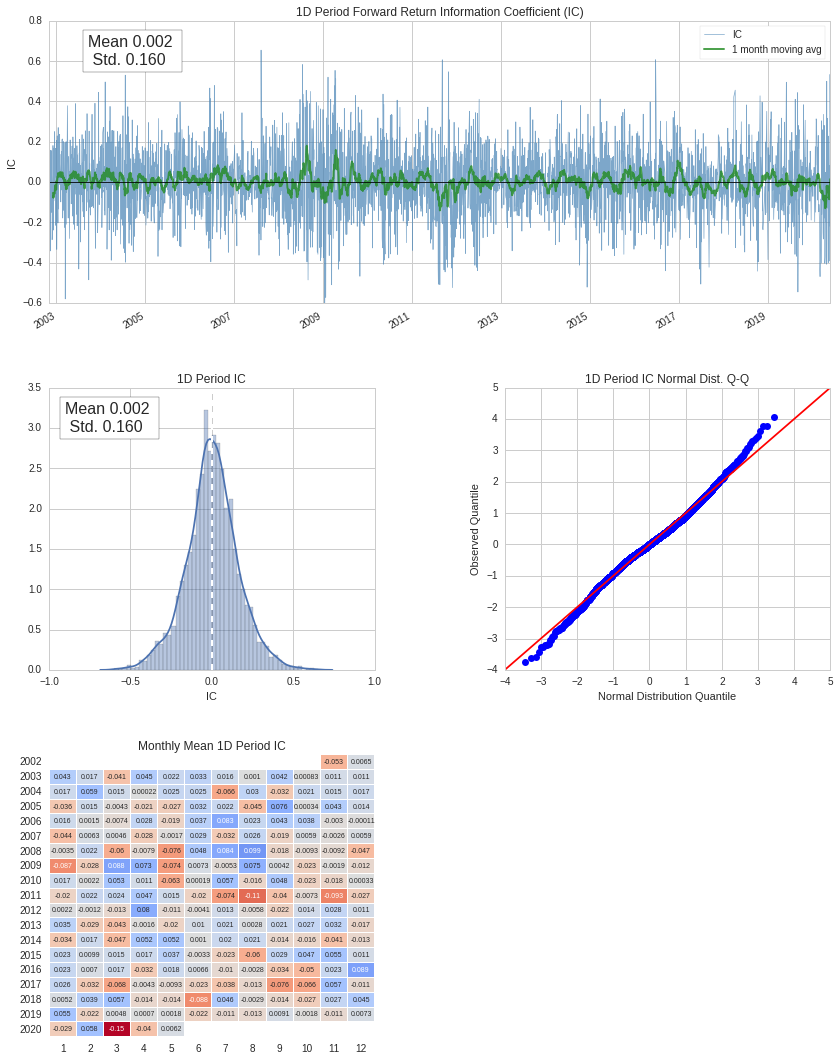

Turnover Analysis


1D
Quantile 1.0 Mean Turnover   0.769
Quantile 2.0 Mean Turnover   0.764

1D
Mean Factor Rank Autocorrelation -0.018

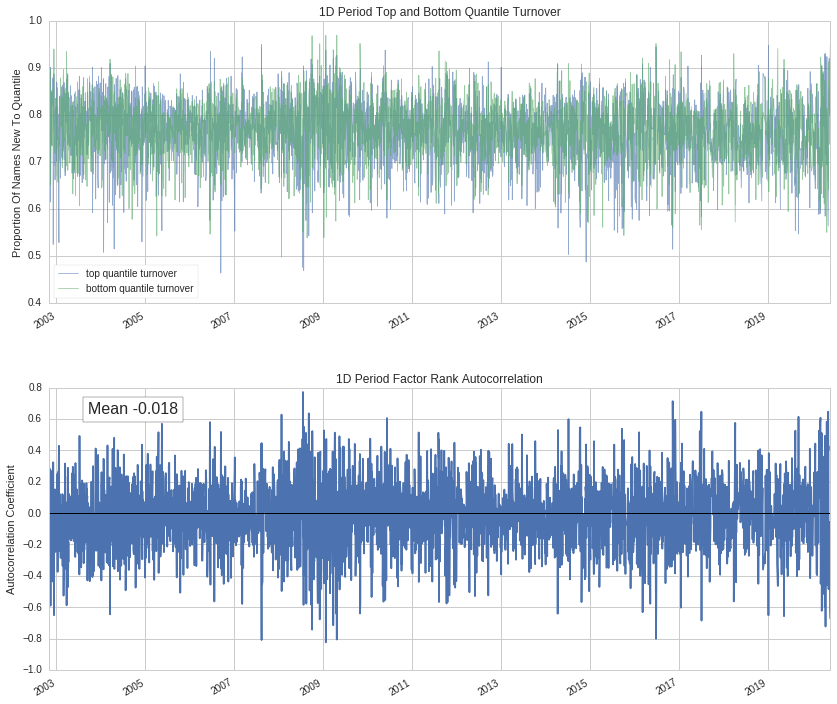

In [124]:
al.tears.create_full_tear_sheet(df_i_1, by_group=False);